# 1. Problem:

To predict the Survived in Titanic ship by using logestic regression model

In [238]:
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve, accuracy_score,plot_confusion_matrix

from imblearn.over_sampling import RandomOverSampler, SMOTE


from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
import json

import warnings
warnings.filterwarnings("ignore")

# 2. Data Gathering

In [100]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 3. Exploratory Data Analysis

In [102]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [103]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,PassengerId[int64],Mean (sd) : 446.0 (257.4)min < med < max:1.0 < 446.0 < 891.0IQR (CV) : 445.0 (1.7),891 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB8ElEQVR4nO3Xv27aYBhH4ddWikxAtvhTuICO3ZBYuICOvdheBENnhi6d2JCQZYSbqBZ11yxJMVaTnuo8K/x4v+EMSdK2bUj/uvStHyBd4+6tH6D/R5Ikw4gY3Dj/2bbtw3Mf/jHUnsfTiPh147bvnnqb+u5sOp1+KopidMv4dDqVSZJ8eS7WF0NNkmQ4m80+53k+6Xr4crm8q+v6w3g8/p6mafOae+pt6rsjIpqmySLi43q9/jqfz09dtlVVZdvtdnI8HgcR0T3UiBjkeT7ZbDYPRVE8djm+3+8nu93u/Wq1+rZcLssu27576m3qu5/s77MsaxaLxY+u+4gYvvThVX+jFkXx2PV4WZbDiIjRaNR523dPvU1999P93+J//UIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVwt01X6qqKuv6w+fzOYuIqOs6OxwO96+5p96mvrvv/pq+fgOe9DS+8Np05AAAAABJRU5ErkJggg=="">",0(0.0%)
2,Survived[int64],Mean (sd) : 0.4 (0.5)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 1.0 (0.8),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABgElEQVR4nO3dQWrCQBiG4ZkiopsEETyMh+hhewhvI2VcVClouuumUGNU2g+eZz3zk8VLQhaZ1GEYCvx3L399ATDG7NqCWuuylDKfOP9zGIbjxL3w7ddQa63L9Xr92nXdasrww+HwXmt9Eyv3unZHnXddt9put8e+70+3DG6tLXa73Wq/389LKULlLlcf/aWU0vf9abPZfEyYv5ywB37wMkUEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKhFFfocIYzzysRKg8xLMPKxEqj/LUw0qEykM967ASL1NEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRRv2+p7W2uHVwa21xPp9npZSu1nrzhRGnu1wus6mtXFvzBf1jTn1geGNvAAAAAElFTkSuQmCC"">",0(0.0%)
3,Pclass[int64],Mean (sd) : 2.3 (0.8)min < med < max:1.0 < 3.0 < 3.0IQR (CV) : 1.0 (2.8),3 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABkklEQVR4nO3dUWoiQRiF0apBRF+6EcHFuIhZ7CzC3chQPkzCgPasILE1XWRucs5rW1I2H1IK+tdpmgr873589gZgjtVnb4Cvo9a6LaWsn1z+d5qml7cuCpVF1Fq3+/3+5zAMu2fWXy6X37XWX2/FKlSWsh6GYXc8Hl/GcXx9ZGFrbXM6nXbn83ldShEq/Y3j+Ho4HP48sXT73kUfpoggVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQiCJUIQiWCUIkgVCIIlQhCJYJQiSBUIgiVCEIlglCJIFQi3P1r9J6TLmCud0PtPekC5rr3jtp10gXMNWsqSq9JFzCX8T0dONcvT6gLc67vQ6jLc67vQKidONcvyxf+RBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqESY9SvU1trm0SdurW2u1+uqlDLUWh/eWLDhdrutvuE9+9DrvveYf4LcdwKKR7CqAAAAAElFTkSuQmCC"">",0(0.0%)
4,Name[object],"1. Braund, Mr. Owen Harris2. Boulos, Mr. Hanna3. Frolicher-Stehli, Mr. Maxmilli4. Gilinski, Mr. Eliezer5. Murdlin, Mr. Joseph6. Rintamaki, Mr. Matti7. Stephenson, Mrs. Walter Bertra8. Elsbury, Mr. William James9. Bourke, Miss. Mary10. Chapman, Mr. John Henry11. other",1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)881 (98.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADXElEQVR4nO3cwWkbYRRG0TdGOPZGQhhcQtKDi0ixKUJFpAdjPIvY8WaySBYpINwB5ZwK/sWFh2A+Ldu2DRRu9n4A/w+xkREbGbGRERsZsZERGxmxkREbGbGRuVmW5cuyLHd7P4TrdzMzn2fm094P4fo5o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mZmvs/Mz70fwvVb/IsRFWeUjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCFj8ELGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjNjIWFeRsa4i44ySERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjXUXGGSUjNjIGL2QMXsg4o2TERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHFGyYiNjMELGYMXMs4oGbGRERsZsZERGxmxkREbGb

### 1.PassengerId

In [105]:
df["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [106]:
df["PassengerId"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: PassengerId
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [107]:
df["PassengerId"].isna().sum()

0

In [108]:
df["PassengerId"].value_counts()

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

<AxesSubplot:xlabel='PassengerId', ylabel='count'>

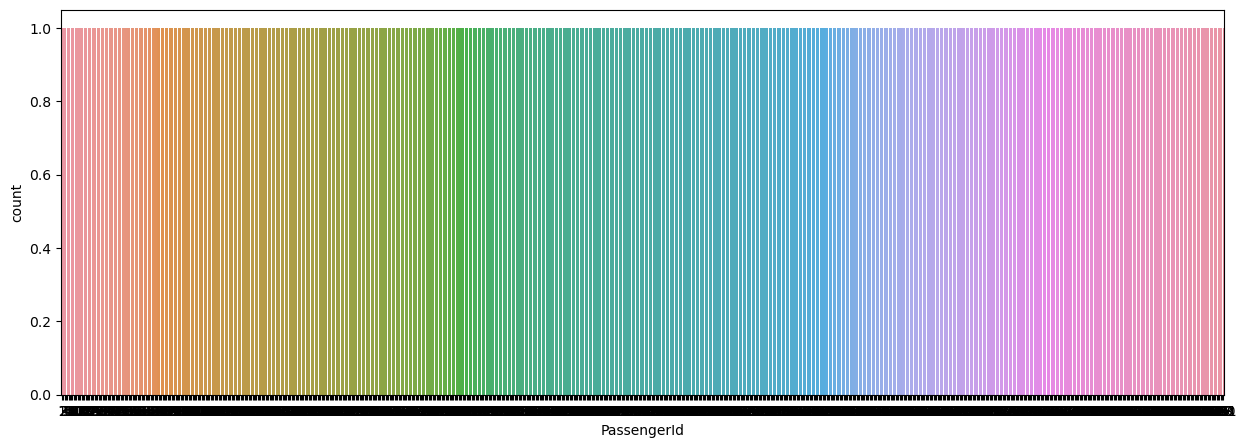

In [109]:
plt.figure(figsize=(15,5))
sns.countplot(x=df["PassengerId"])

<AxesSubplot:xlabel='PassengerId'>

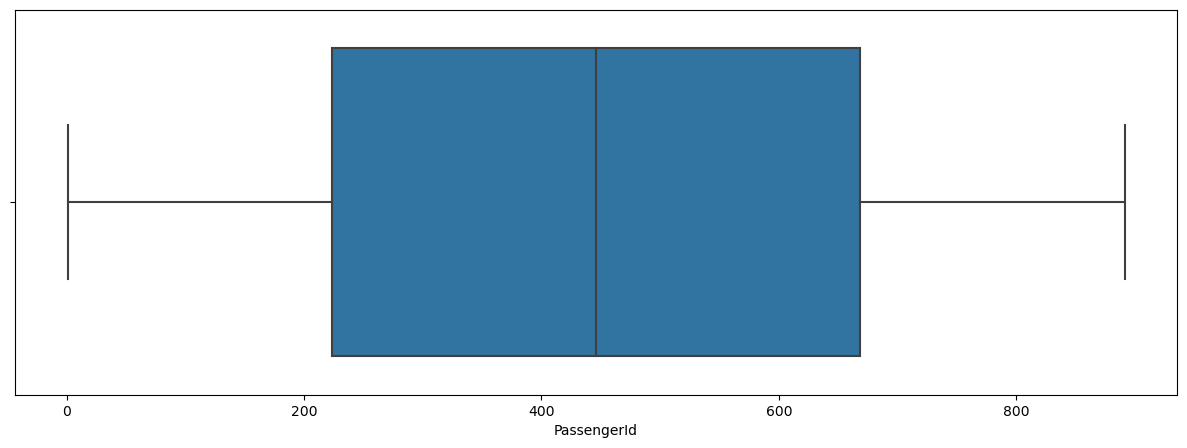

In [110]:
plt.figure(figsize=(15,5))
sns.boxplot(df['PassengerId'])

### 2. Survived

In [111]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [112]:
df['Survived'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [113]:
df['Survived'].isna().sum()

0

In [114]:
df['Survived'].value_counts()

0    547
1    344
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

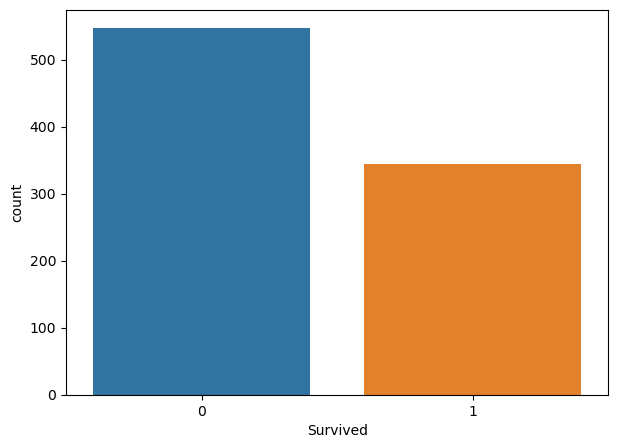

In [115]:
plt.figure(figsize=(7,5))
sns.countplot(x=df["Survived"])

<AxesSubplot:xlabel='Survived'>

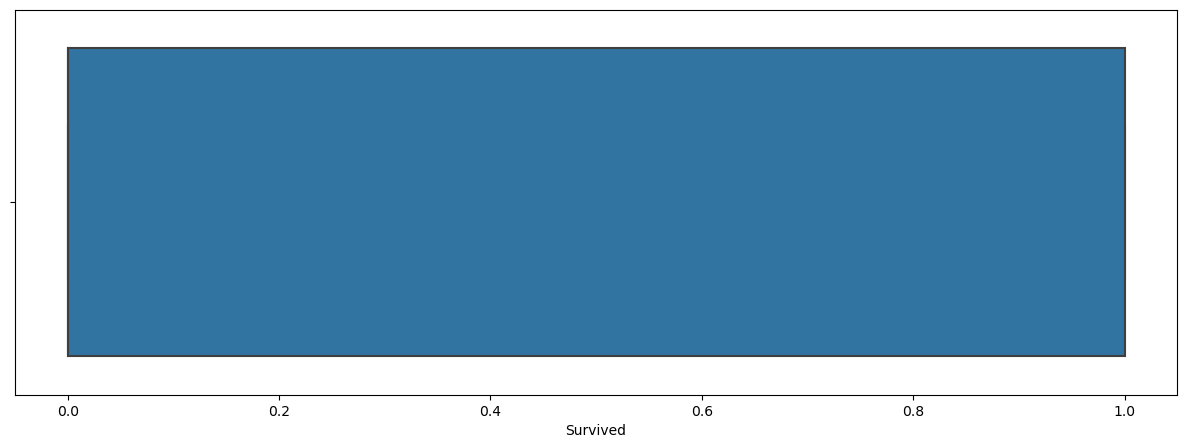

In [116]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Survived'])

### 3. Pclass

In [117]:
df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [118]:
df["Pclass"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [119]:
df["Pclass"].isna().sum()

0

In [120]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

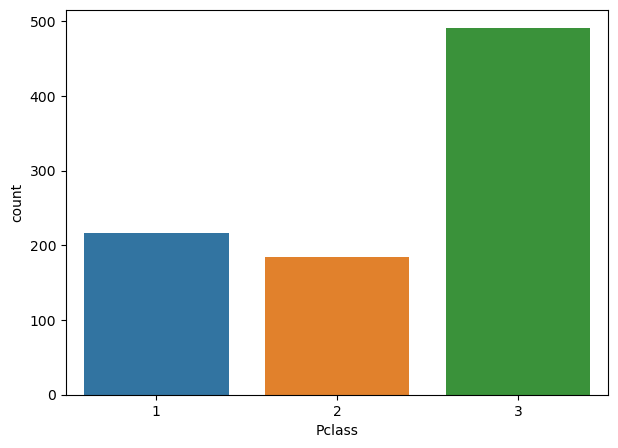

In [121]:
plt.figure(figsize=(7,5))
sns.countplot(x=df["Pclass"])

<AxesSubplot:xlabel='Pclass'>

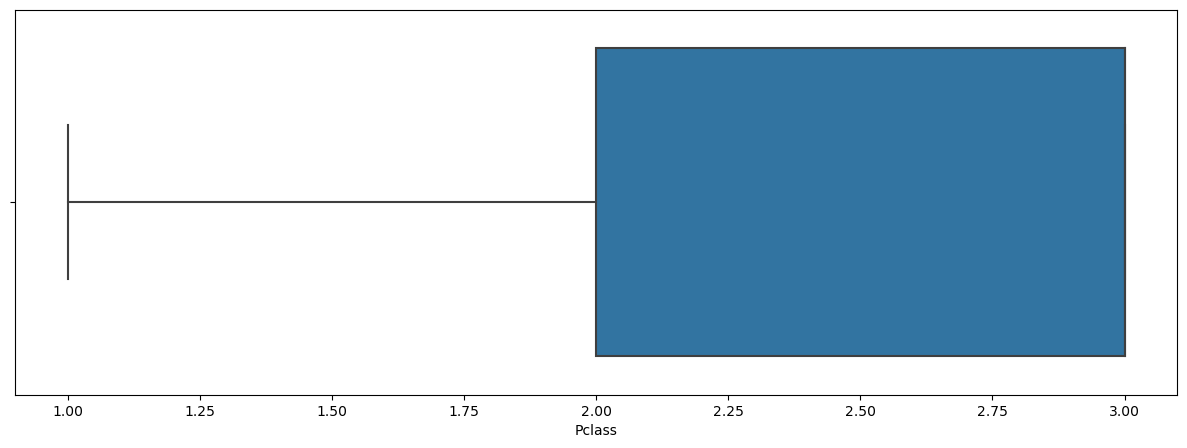

In [122]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Pclass'])

### 4. Name

In [123]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [124]:
df['Name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [125]:
df['Name'].isna().sum()

0

In [126]:
df['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [127]:
# plt.figure(figsize=(15,5))
# sns.countplot(x=df["Name"])

### 5. Gender

In [128]:
df["Gender"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Gender, Length: 891, dtype: object

In [129]:
df["Gender"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [130]:
df["Gender"].isna().sum()

0

In [131]:
df["Gender"].value_counts()

male      577
female    314
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

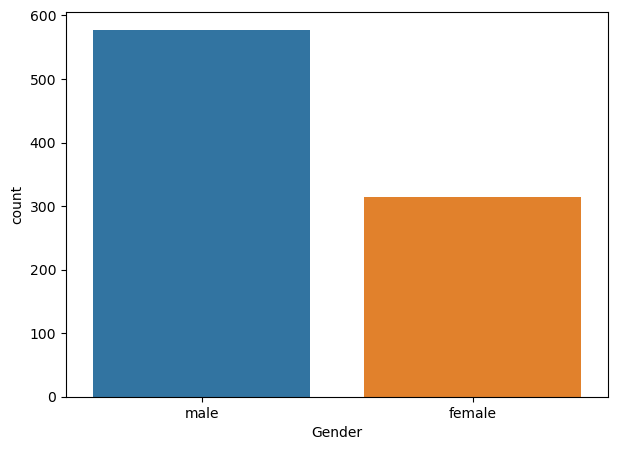

In [132]:
plt.figure(figsize=(7,5))
sns.countplot(x=df["Gender"])

### 6. Age

In [133]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [134]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [135]:
df['Age'].isna().sum()

177

In [136]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [137]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<AxesSubplot:xlabel='Age', ylabel='count'>

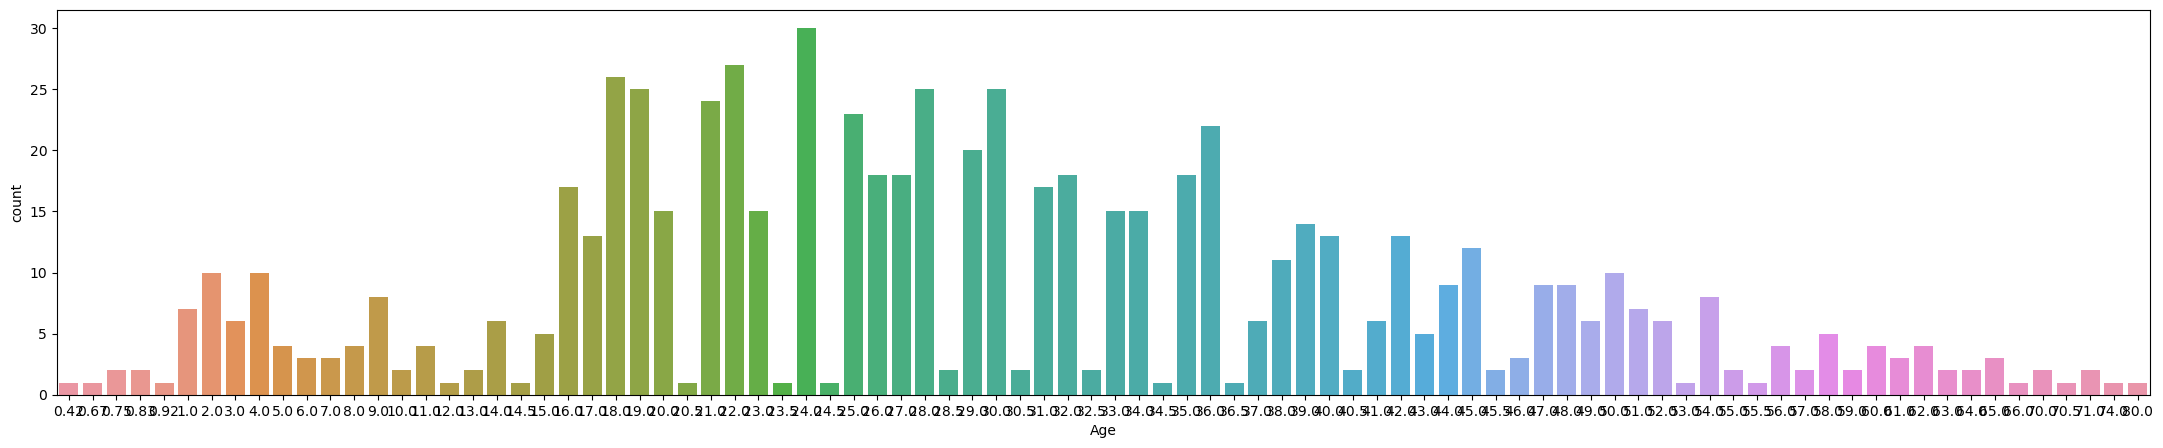

In [138]:
plt.figure(figsize=(27,5))
sns.countplot(x=df["Age"])

<AxesSubplot:xlabel='Age'>

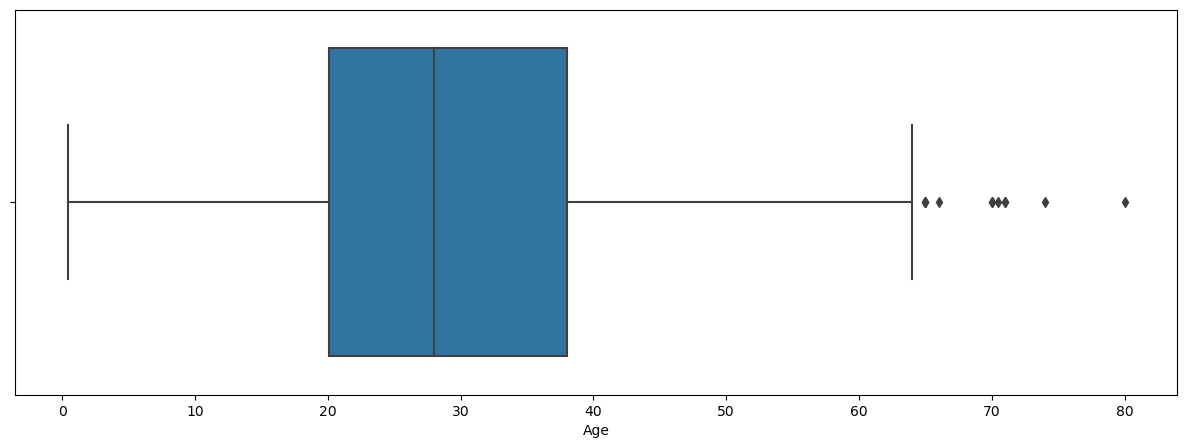

In [139]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Age'])

### 7. SibSp

In [140]:
df["SibSp"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [141]:
df["SibSp"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: SibSp
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [142]:
df["SibSp"].isna().sum()

0

In [143]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

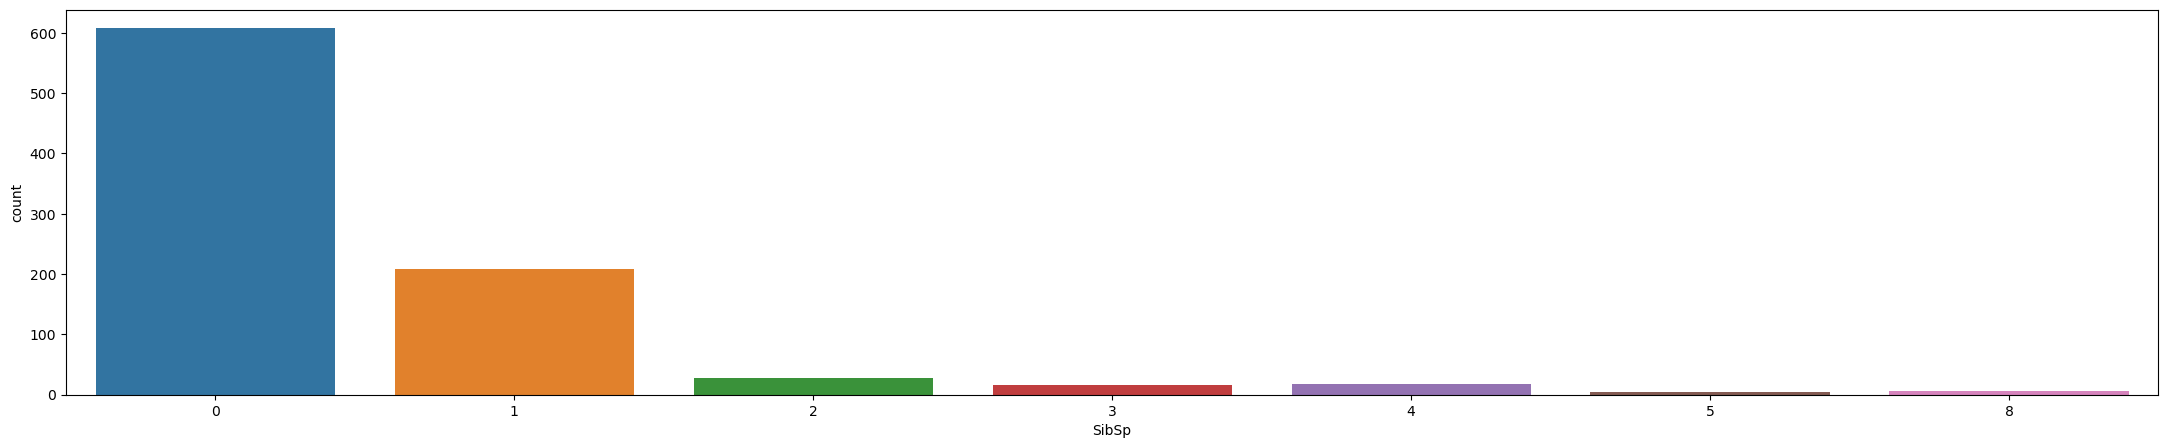

In [144]:
plt.figure(figsize=(27,5))
sns.countplot(x=df["SibSp"])

<AxesSubplot:xlabel='SibSp'>

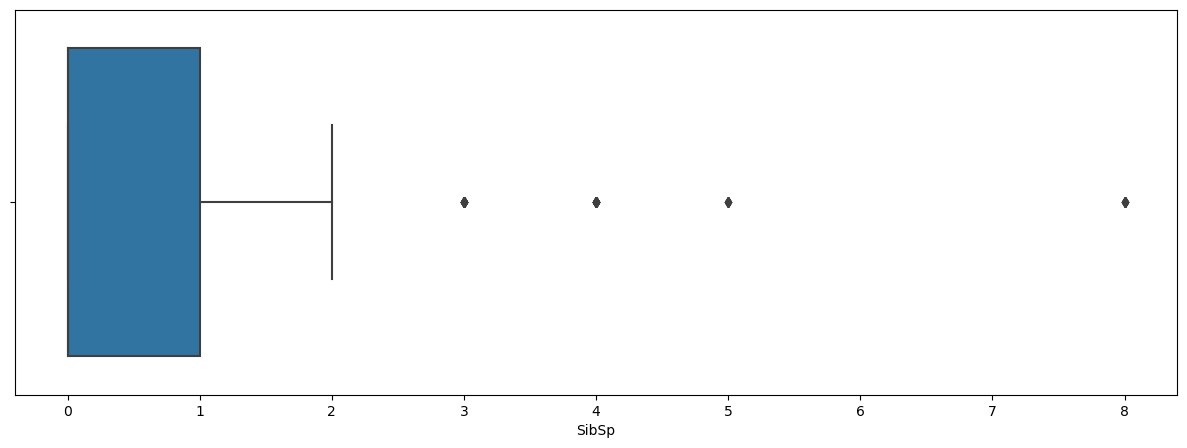

In [145]:
plt.figure(figsize=(15,5))
sns.boxplot(df['SibSp'])

### 8. Parch

In [146]:
df['Parch']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 891, dtype: int64

In [147]:
df['Parch'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Parch
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [148]:
df['Parch'].isna().sum()

0

In [149]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

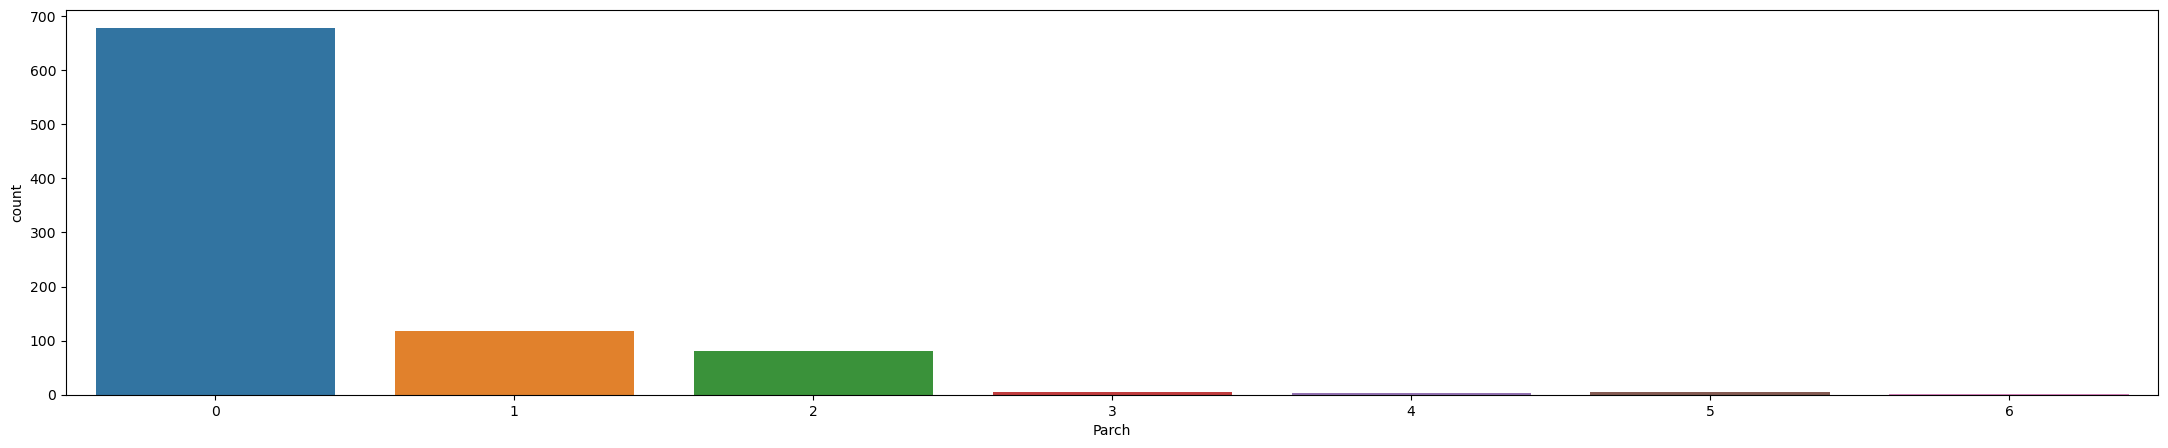

In [150]:
plt.figure(figsize=(27,5))
sns.countplot(x=df["Parch"])

<AxesSubplot:xlabel='Parch'>

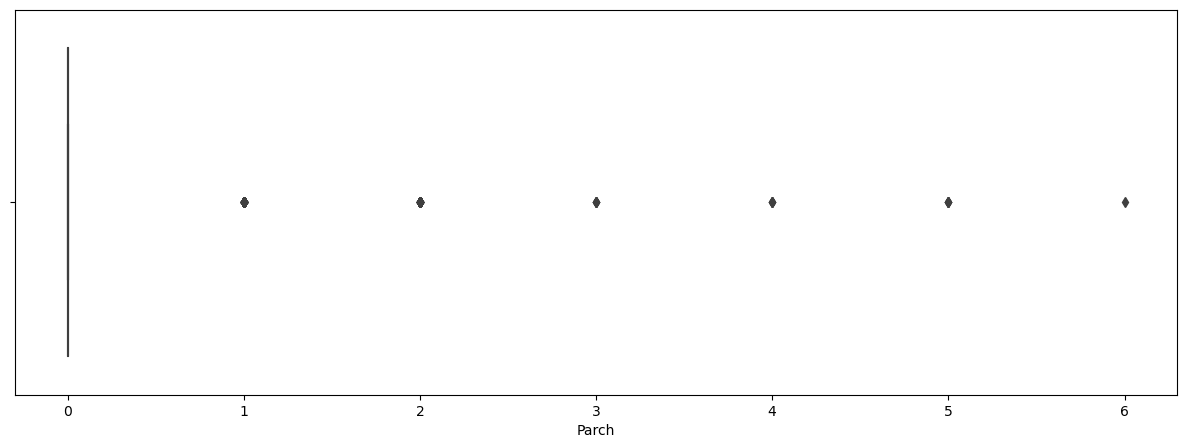

In [151]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Parch'])

### 9. Ticket

In [152]:
df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [153]:
df['Ticket'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Ticket
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [154]:
df['Ticket'].isna().sum()

0

In [155]:
df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

<AxesSubplot:xlabel='Ticket', ylabel='count'>

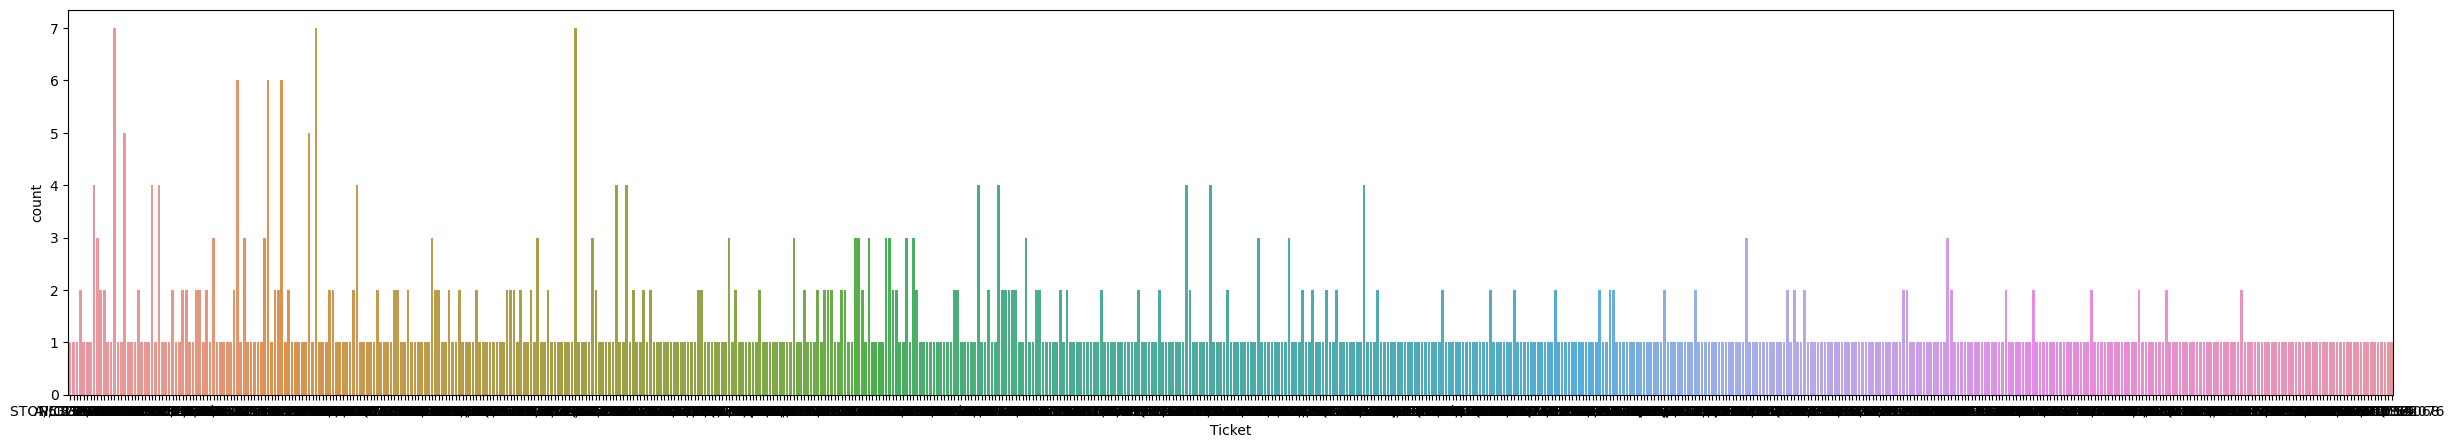

In [156]:
plt.figure(figsize=(30,5))
sns.countplot(x=df["Ticket"])

### 10. Fare

In [157]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [158]:
df['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [159]:
df['Fare'].isna().sum()

0

In [160]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='count'>

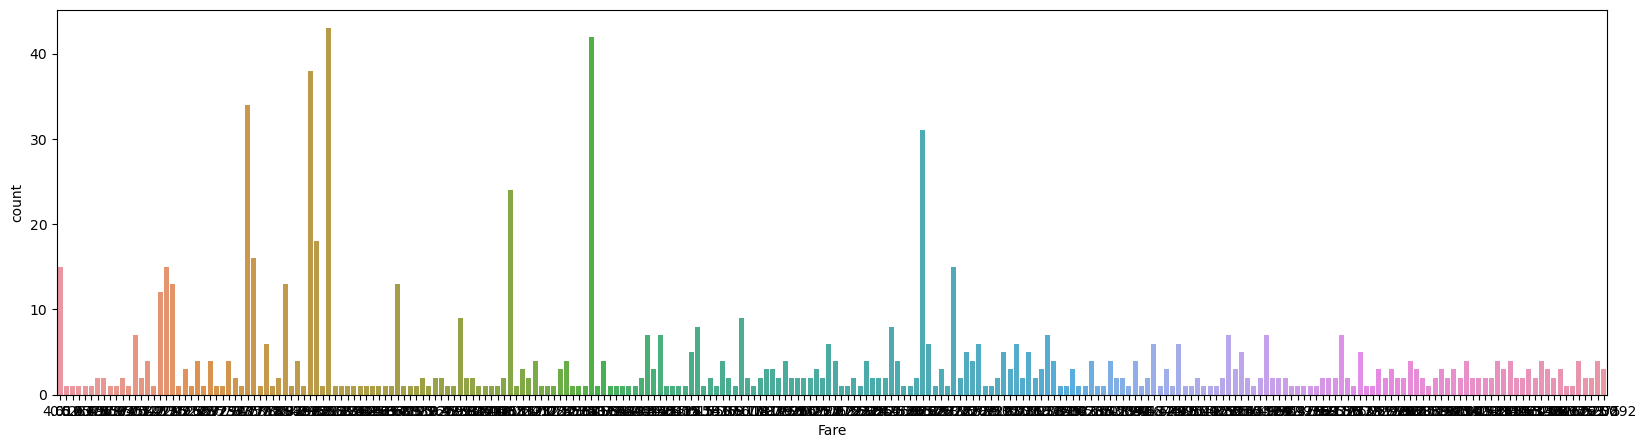

In [161]:
plt.figure(figsize=(20,5))
sns.countplot(x=df["Fare"])

<AxesSubplot:xlabel='Fare'>

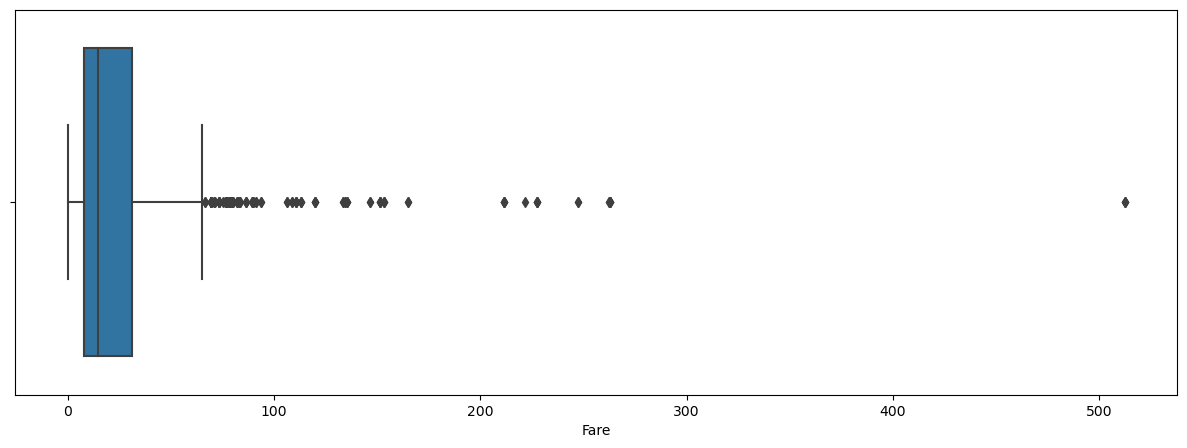

In [162]:
plt.figure(figsize=(15,5))
sns.boxplot(df['Fare'])

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 11. Cabin

In [164]:
df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [165]:
df['Cabin'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [166]:
df['Cabin'].isna().sum()

687

In [167]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

<AxesSubplot:xlabel='Cabin', ylabel='count'>

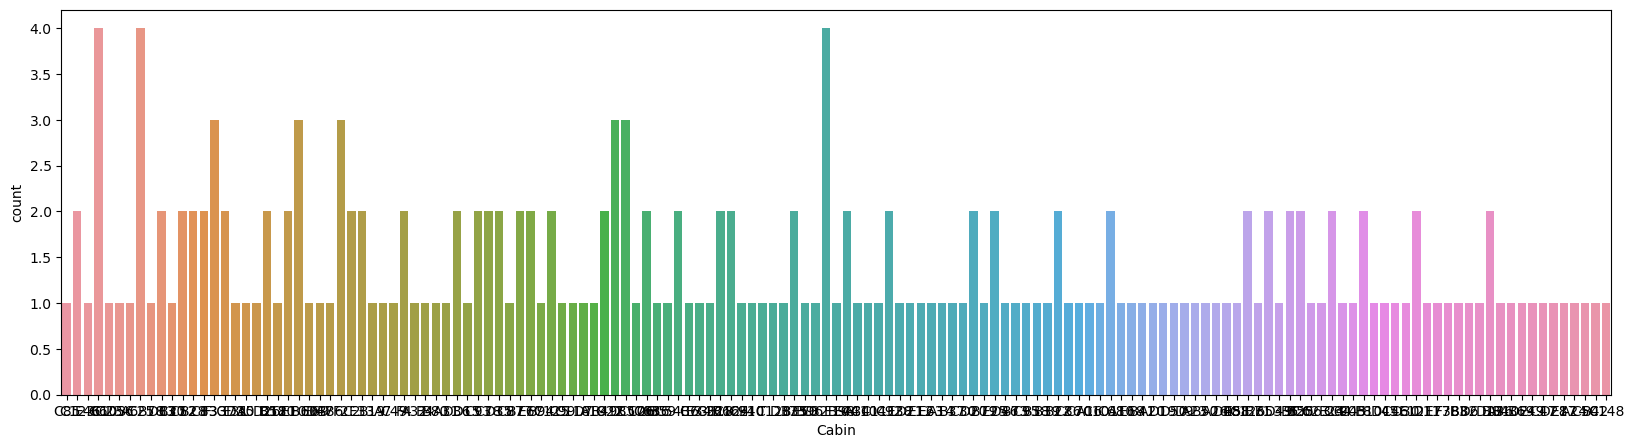

In [168]:
plt.figure(figsize=(20,5))
sns.countplot(x=df["Cabin"])

### 12. Embarked

In [169]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [170]:
df['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [171]:
df['Embarked'].isna().sum()

2

In [172]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

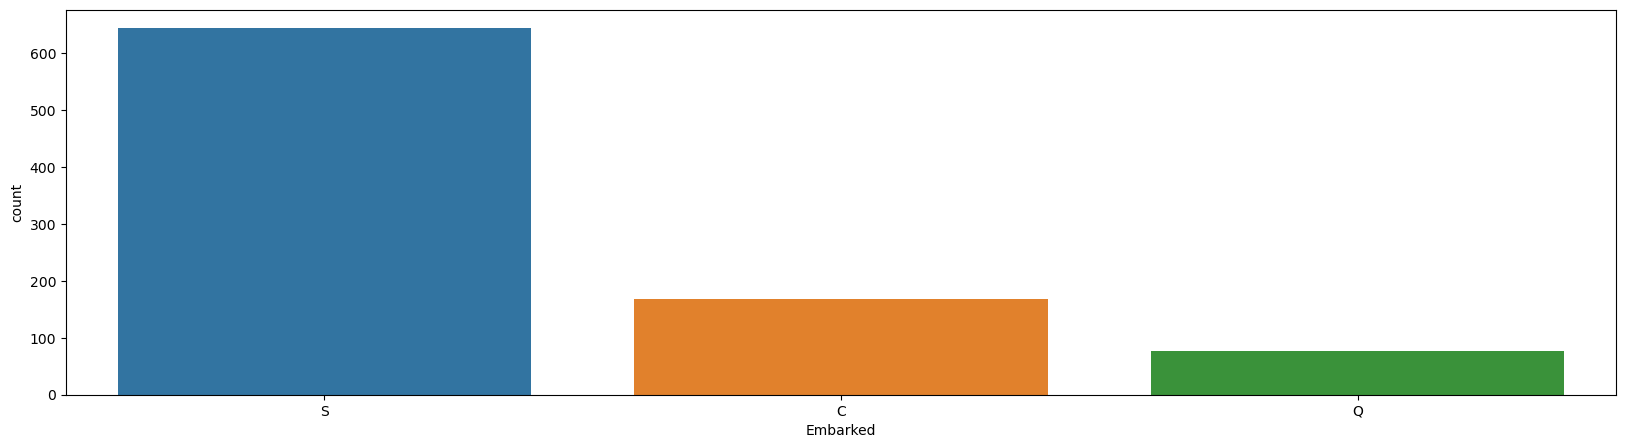

In [173]:
plt.figure(figsize=(20,5))
sns.countplot(x=df["Embarked"])

# 4. Feature Engineering

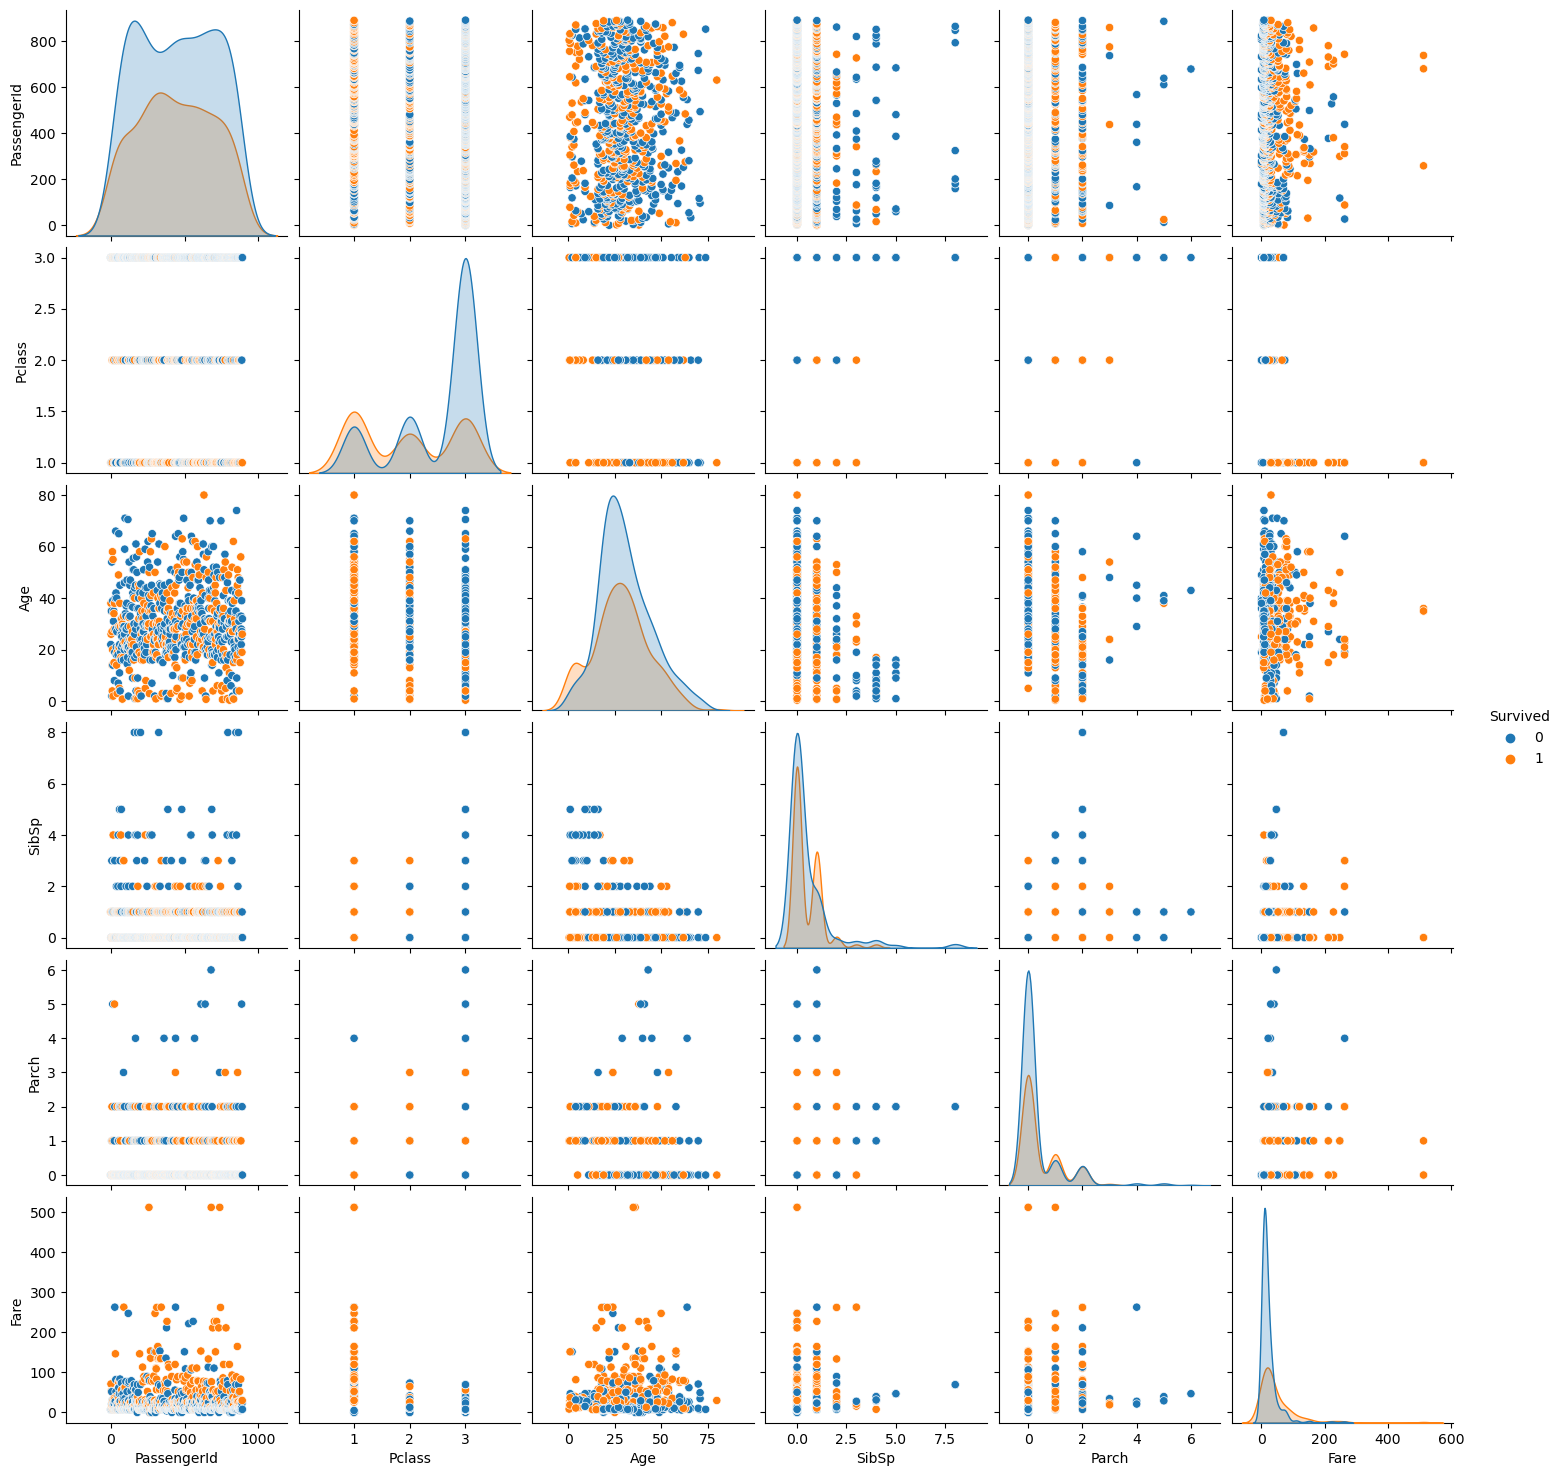

In [174]:
 sns.pairplot(df, hue = 'Survived')

### 4.1 Missing value Imputation

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 6   Age 

In [176]:
df['Age'].isna().sum()

177

In [177]:
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype(float)

In [178]:
df['Age'].isna().sum()

0

### 11  Cabin

In [179]:
df['Cabin'].isna().sum()

687

In [180]:
# this feature is containing too many missing values around 77.1% so this fearture is no use 
# of use so we can drop this Feature from our dataframe

In [181]:
df = df.drop('Cabin', axis= 1)

In [182]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


### 12  Embarked 

In [183]:
df['Embarked'].isna().sum()

2

In [184]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [185]:
df['Embarked'].isna().sum()

0

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


## Encoding 

### Gender       

In [187]:
df['Gender'].value_counts().to_dict()

{'male': 577, 'female': 314}

In [188]:
df["Gender"].replace({'male': 0, 'female': 1},inplace=True)

In [190]:
Gender_values = {'male': 0, 'female': 1}
Gender_values

{'male': 0, 'female': 1}

In [191]:
df['Gender'].value_counts().to_dict()

{0: 577, 1: 314}

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


### Name

In [197]:
df['Name'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [ ]:
df.info()

### Ticket

In [ ]:
df['Ticket']

In [ ]:
df = pd.get_dummies(df, columns=['Ticket'])
df

### Embarked

In [194]:
df['Embarked'].value_counts().to_dict()

{'S': 646, 'C': 168, 'Q': 77}

In [195]:
df["Embarked"].replace({'S': 0, 'C': 1, 'Q': 2},inplace=True)

In [198]:
df['Embarked'].value_counts().to_dict()

{0: 646, 1: 168, 2: 77}

In [199]:
Embarked_values = {'S': 0, 'C': 1, 'Q': 2}
Embarked_values

{'S': 0, 'C': 1, 'Q': 2}

In [196]:
df['Embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [201]:
df.drop(["PassengerId","Name","Ticket"],axis=True,inplace=True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


## 4.2 Removing outliers

## 4.3 Scaling

# 5. Feature Selection

### 5.1 Assumption

In [203]:
df.corr()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.334297,0.539358,-0.076367,-0.029105,0.082218,0.255762,0.111329
Pclass,-0.334297,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Gender,0.539358,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.076367,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.029105,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.082218,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.255762,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.111329,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


<AxesSubplot:>

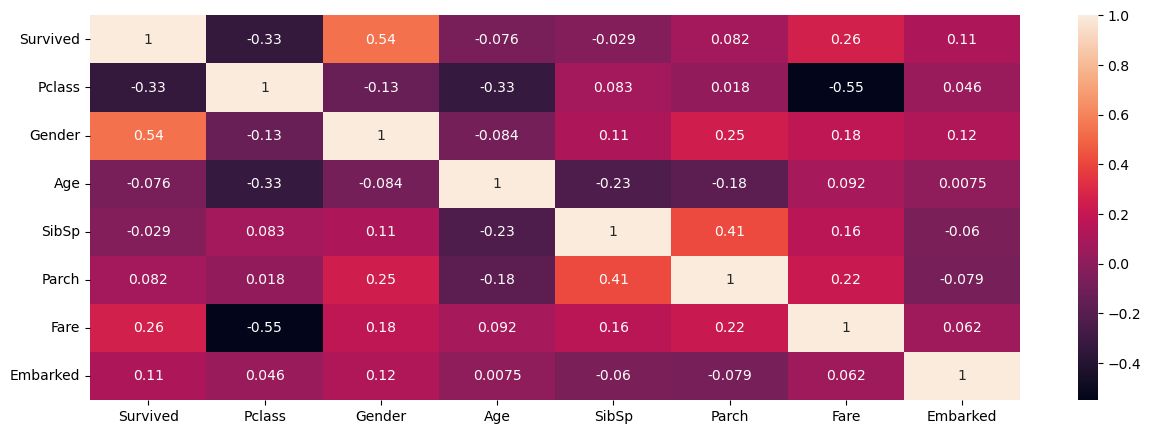

In [204]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)

# 6. Model Building

### 6.1. sampling

### 6.2. Splitting the data into Training data and Testing data

In [205]:
# regular Model

# independent variable(x)
x = df.drop('Survived', axis= 1)

# dependent variable(y)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=21,stratify=y)

In [206]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (623, 7)
shape of y_train: (623,)
shape of x_test: (268, 7)
shape of y_test: (268,)


### 6.3 Model Training

### Logistic Regression

In [208]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

### Model Evaluation

In [214]:
# Model Evaluation for Testing Data

y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*70)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy \n',accuracy)
print("*"*70)

clf_report= classification_report(y_test, y_pred)
print("Classification Report\n", clf_report)

Confusion Matrix:
 [[139  26]
 [ 30  73]]
**********************************************************************
Accuracy 
 0.7910447761194029
**********************************************************************
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       165
           1       0.74      0.71      0.72       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



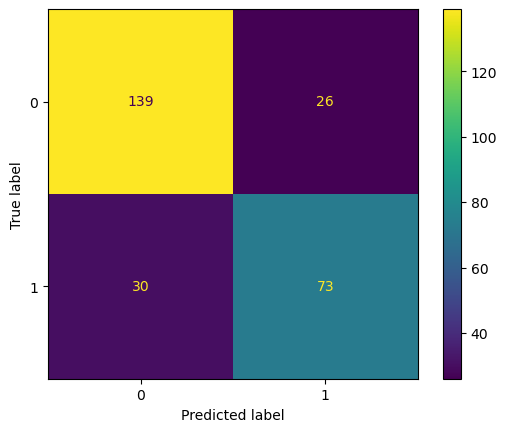

In [220]:
plot_confusion_matrix(logistic_model,x_test,y_test)

In [216]:
# Model Evaluation for Training Data

y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*70)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy: ",accuracy)
print("*"*70)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[331  51]
 [ 72 169]]
**********************************************************************
Accuracy:  0.8025682182985554
**********************************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       382
           1       0.77      0.70      0.73       241

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.79       623
weighted avg       0.80      0.80      0.80       623



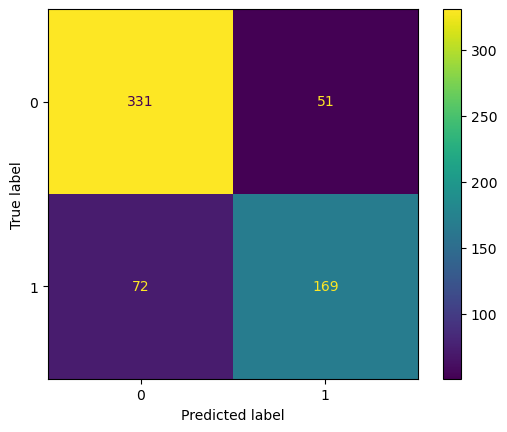

In [221]:
plot_confusion_matrix(logistic_model,x_train,y_train)

### AUC-ROC

In [223]:
y_pred_prob = logistic_model.predict_proba(x_train)   
y_pred_prob[:,1]
fpr, tpr, thresh = roc_curve(y_train, y_pred_prob[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics Curve')

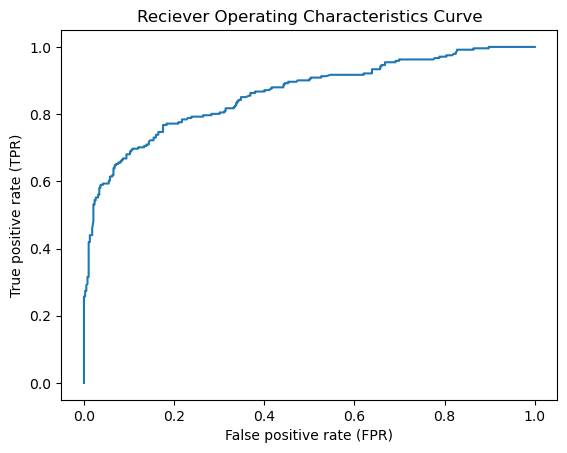

In [224]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FPR)")
plt.ylabel("True positive rate (TPR)")
plt.title("Reciever Operating Characteristics Curve")

In [225]:
auc_value = auc(fpr, tpr)
auc_value

0.8614737894027937

# Pickle File

In [227]:
with open('Logistic model.pkl', 'wb') as f:
    pickle.dump(logistic_model,f)

In [234]:
column_names = x.columns
column_names

Index(['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [236]:
json_data={"Gender":Gender_values,
          "Embarked":Embarked_values,
          "columns":list(column_names)}
json_data

{'Gender': {'male': 0, 'female': 1},
 'Embarked': {'S': 0, 'C': 1, 'Q': 2},
 'columns': ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']}

In [239]:
with open("project_data.json","w") as f:
    json.dump(json_data,f)

## Single user Input Testing

In [229]:
x_test.iloc[20]

Pclass       3.00
Gender       0.00
Age         25.00
SibSp        0.00
Parch        0.00
Fare         7.25
Embarked     0.00
Name: 785, dtype: float64

In [241]:
Pclass = 3.00
Gender = "male"
Age = 25.00
SibSp = 0.00
Parch = 0.00
Fare = 7.25
Embarked = "S"

In [242]:
test_array=np.zeros(len(column_names))
test_array

array([0., 0., 0., 0., 0., 0., 0.])

In [243]:
test_array=np.zeros(len(column_names))
test_array[0]=Pclass
test_array[1]=json_data["Gender"][Gender]
test_array[2]=Age
test_array[3]=SibSp
test_array[4]=Parch
test_array[5]=Fare
test_array[6]=json_data["Embarked"][Embarked]

In [245]:
charges=round(logistic_model.predict([test_array])[0],2)
if charges==1:
    print("Survieved")
else:
    print("Not Survieved")

Not Survieved
